# ATTENTION!!!!
NO 4 SELECTION IN THIS PROJECT!!!!

In [ ]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-base"
batch_size = 16
num_epochs = 16

fileTag = "clean-v1"

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [2]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [3]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//4], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//4:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//4], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//4:trainDatasetOriginal.shape[0]//2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//2:trainDatasetOriginal.shape[0]//4*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//4*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//4*3], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//4*3:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//4 else (1 if x < trainDatasetOriginal.shape[0]//2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//4*3 
                                                                                               else 3)) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//4], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//4:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//4], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//4:testDatasetOriginal.shape[0]//2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//2:testDatasetOriginal.shape[0]//4*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//4*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//4*3], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//4*3:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//4 else (1 if x < testDatasetOriginal.shape[0]//2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//4*3 
                                                                                               else 3)) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [4]:
trainDatasetProcessed.to_csv(f'./dataset/4Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,label
0,"['scared', 'helpless', 'uncomfortable', 'nervo...","{'joy': 0, 'trust': 2, 'fear': 1, 'surprise': ...","Finally, the day came when she could get in th...",They're planning to learn to weave together!,Tim was playing in the house.,He asked his friend for advice about the probl...,3
1,"['nervous', 'loving', 'enthralled']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ...",He showed up the next day with white skin and ...,I opened the large door with my shoulder.,Lonnie had the biggest crush on Lorrie.,Shana used to live in a run-down trailer in th...,2
2,"['tired', 'exhausted', 'bored']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...","Terrin moved back, but changed a lot.",He was tired of walking.,Larry received a toy for his birthday.,"One day, he could not find his bag.",1
3,"['self-conscious', 'inadequate', 'anticipation...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He couldn't keep fixing it.,"In the moving process, Tubby was misplaced in ...",Right now i can only leg lift about one hundre...,Carly crashed into the wall because she didn't...,2
4,"['excitement', 'excited']","{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...","While leaving the office, William closed his f...",Liam moved to a new house.,It's tempting to keep holding the rope.,He eats a handful of peanuts.,1
...,...,...,...,...,...,...,...
11605,"['exhausted', 'tired', 'relieved']","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",He really wanted to relax.,Tanya decided to sneak into Kim's room and tak...,Sam stayed at a friend's house during his visit.,Freda was a cocky woman.,0
11606,"['proud', 'happy', 'nervous', 'anxious']","{'joy': 1, 'trust': 0, 'fear': 2, 'surprise': ...",They were psyched for the big game!,"Ryan bought a large, impressive engagement ring.",She secretly switched him to decaffeinated cof...,One day his phone rang and it was his ex wife.,1
11607,"['hopeful', 'determined']","{'joy': 0, 'trust': 1, 'fear': 1, 'surprise': ...",They headed to an old abandoned barn to light ...,They decided to run around in a hotel.,She mostly walked around watching people have ...,"She went home, researched how to fix it and go...",3
11608,"['excited', 'delighted', 'accomplished']","{'joy': 3, 'trust': 1, 'fear': 0, 'surprise': ...",I finally got my PHD.,Sheila loves her Australian home.,She was so sick from the heat when she got there.,She dug through her freezer but had no ideas.,0


In [5]:
testDatasetProcessed.to_csv(f'./dataset/4Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,label
0,"['achievable', 'determined', 'proud']","{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",He wound up making millions playing video games.,She worked hard all year to get nominated.,She also had a pool and I was excited to swim ...,His plane lands and he gets out of the airport.,1
1,"['unhappy', 'violated', 'content']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",She wanted to host a bonfire party for her fri...,Diane convinced management to give the workers...,And his friend talked him into getting the sam...,Her ordeal provided a conversation that lasted...,3
2,"['playful', 'fun', 'accompanied', 'furnished',...","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",He asked a friend to help him study.,Jane wanted to have a water gun fight.,John talked to his counselor.,Finn loved to go hiking.,1
3,['foolish'],"{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",But she chose to wait for her friend so she wo...,Gina was carrying gallons of water in plastic ...,She found out she had forgotten her wallet.,Alison lined up at the start line.,2
4,"['worried', 'surprised', 'happy', 'scared', 't...","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Their realtor called while they were out and t...,"Suddenly, Julia stopped short and the color dr...",In 6 months I lost 100 pounds!,I looked around the school for one as well.,1
...,...,...,...,...,...,...,...
11124,"['relaxed', 'happy']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ...",He got into his car and relaxed in the seat be...,Melinda fell asleep in the car going home beca...,Gustav had won the contest of strengths by ben...,Everything was going well when one of the ball...,0
11125,"['nervous', 'scared']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...","My stepmother was physically abusive, while st...","When everyone ate the soup, they complained ab...",His father told him no.,"As soon as she sat down, she flinched.",3
11126,"['disappointed', 'unhappy', 'fear', 'upset']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Some bubbles popped in her hair.,She stumbled over her first few words.,"During the hike, Jim fell and twisted his ankle.",My brother and his family went to buy food for...,2
11127,"['proud', 'accomplished']","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",They decided to go on jungle trekking adventure.,He calls it the iPhone.,Ben was training to become a police officer.,At the beginning of the year we moved the shop.,1


# load dataset

In [6]:
from datasets import load_dataset, load_metric

In [7]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/4Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/4Select-{fileTag}-test.csv'})

Using custom data configuration default-c2d0ae98ecdd3708


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-c2d0ae98ecdd3708\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'label'],
        num_rows: 11129
    })
})

In [9]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['achievable', 'determined', 'proud']",
 'plutchik': "{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}",
 'selection0': 'He wound up making millions playing video games.',
 'selection1': 'She worked hard all year to get nominated.',
 'selection2': 'She also had a pool and I was excited to swim in it.',
 'selection3': 'His plane lands and he gets out of the airport.',
 'label': 1}

In [13]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D'][example['label']]}")

In [14]:
show_one(dataset["train"][0])

Context: {'joy': 0, 'trust': 2, 'fear': 1, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}
  A - Finally, the day came when she could get in the ring.
  B - They're planning to learn to weave together!
  C - Tim was playing in the house.
  C - He asked his friend for advice about the problem he had.

Ground truth: option D


# Preprocessing Data

In [15]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [18]:
import re
selectionList = ["selection0", "selection1", "selection2", "selection3"]
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
                                                        + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
                        for eachCaseWeight, eachCaseEmotionType in 
                        zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
                           [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*4 for eventIndex in 
                           range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    # first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                    for eachEmotion in ast.literal_eval(context).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+4] for i in range(0, len(v), 4)] for k, v in tokenized_examples.items()}

In [19]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 4 [46, 42, 40, 45]


In [20]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(4) ]

['<s>The following sentences contain emotions: NOT joy, trust, LITTLE fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>Finally, the day came when she could get in the ring.</s>',
 "<s>The following sentences contain emotions: NOT joy, trust, LITTLE fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>They're planning to learn to weave together!</s>",
 '<s>The following sentences contain emotions: NOT joy, trust, LITTLE fear, NOT surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>Tim was playing in the house.</s>',
 '<s>The following sentences contain emotions: LITTLE joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>He showed up the next day with white skin and no muscles.</s>',
 '<s>The following sentences contain emotions: LITTLE joy, LITTLE trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>I opened the large door with my sh

In [21]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [22]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultipleChoice: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [23]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [24]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [25]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [26]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(4)]

['<s>The following sentences contain emotions: VERY joy, trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>This time the train was late.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 "<s>The following sentences contain emotions: VERY joy, trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>The night ended up a success even though I didn't spend a dime.</s><pad><pad><pad><pad><pad><pad><pad>",
 '<s>The following sentences contain emotions: VERY joy, trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>They started eating their hot dog lunches.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: VERY joy, trust, NOT fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, anticipation</s></s>A week later the shoes arrived in Cambridge.</s><pad><pad><pad><pad><pad><pad>

In [27]:
show_one(dataset["train"][8])

Context: {'joy': 3, 'trust': 2, 'fear': 0, 'surprise': 1, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}
  A - This time the train was late.
  B - The night ended up a success even though I didn't spend a dime.
  C - They started eating their hot dog lunches.
  C - A week later the shoes arrived in Cambridge.

Ground truth: option B


# Trainer Defined

In [19]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [20]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [21]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: plutchik, Unnamed: 0, selection1, emotion, selection0. If plutchik, Unnamed: 0, selection1, emotion, selection0 are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 53234
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 53248


Epoch,Training Loss,Validation Loss,Accuracy
1,0.693800,0.693128,0.504018
2,0.614600,0.594435,0.656838
3,0.564700,0.571774,0.684685
4,0.526300,0.572104,0.695053
5,0.499500,0.586160,0.701162
6,0.472300,0.586649,0.705170
7,0.467500,0.620333,0.704207
8,0.444200,0.623844,0.704265
9,0.415700,0.655308,0.705055
10,0.394100,0.685141,0.703860


Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsen

TrainOutput(global_step=53248, training_loss=0.4483006133769567, metrics={'train_runtime': 8821.4262, 'train_samples_per_second': 96.554, 'train_steps_per_second': 6.036, 'total_flos': 5.267817952412011e+16, 'train_loss': 0.4483006133769567, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

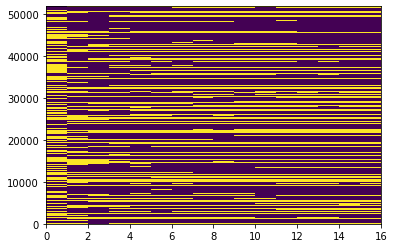

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [23]:
import pandas as pd
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[plutchik]trainingInfo-{fileTag}.csv')

In [24]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[plutchik]evaluationSpecificInfo-{fileTag}.csv')